In [1]:
import sys
import itertools
import numpy as np
import pandas as pd

## 1 - [.getsizeof](https://docs.python.org/3/library/sys.html#sys.getsizeof) basics

In [ ]:
sys.getsizeof()

In [3]:
a = 10
sys.getsizeof(a)

28

In [4]:
sys.getsizeof(int)

400

In [5]:
a = 10 ** 10
sys.getsizeof(a)

32

In [6]:
a = 10 ** 50
sys.getsizeof(a)

48

In [7]:
a = 10 ** 500
sys.getsizeof(a)

248

In [8]:
np.linspace(3, 21, 7)

array([ 3.,  6.,  9., 12., 15., 18., 21.])

In [9]:
# list comprehension
l = [10, 100000, 1000000]
lc = [e ** (1 / np.pi) for e in l]

In [10]:
lc

[2.0811811619898575, 39.04356189303009, 81.25672550875927]

In [11]:
[np.log(e) for e in lc if (int(e) % 2) != 0]

[3.664677994397139, 4.397613593276566]

In [12]:
np.float16(2 ** 14 + 2 ** 3) == np.float16(2 ** 14)

True

In [13]:
int("11111111", base=2)

255

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


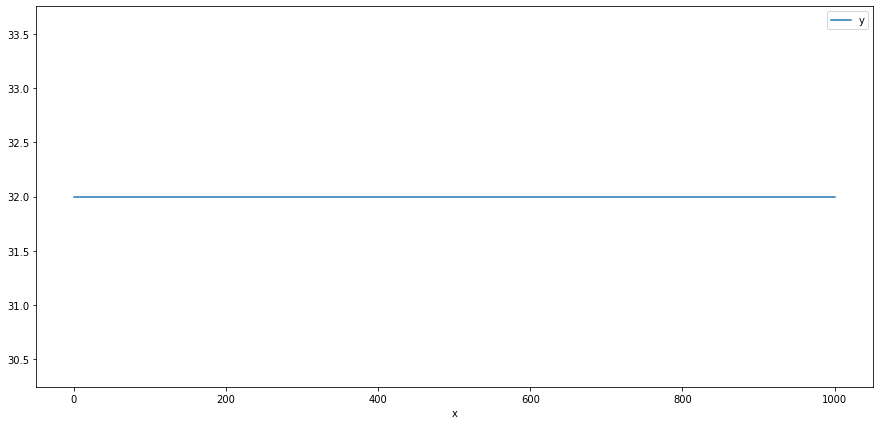

In [14]:
x = np.linspace(1, 1001, 21)

y = [sys.getsizeof(256 ** e) for e in x]

ax = pd.DataFrame({"x": x, "y": y}).plot(x="x", y="y", figsize=(15, 7))

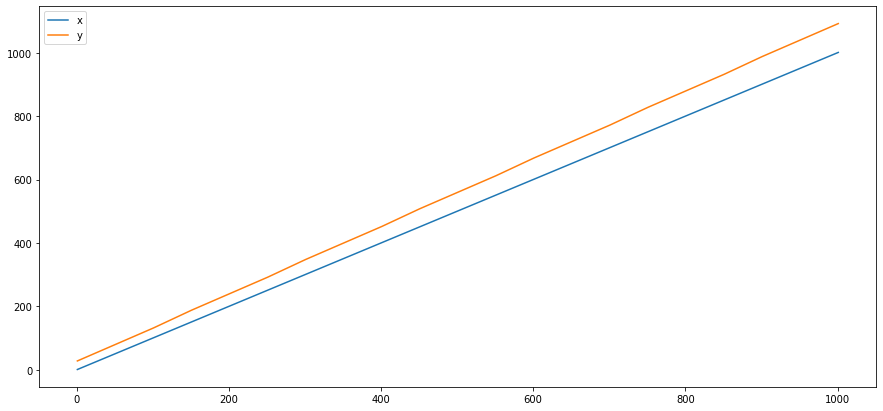

In [15]:
x = np.linspace(1, 1001, 21)
y = [sys.getsizeof(256 ** int(e)) for e in x]
ax = pd.DataFrame(index=x,
                  data={"x": x, "y": y}).plot(figsize=(15,7))

In [16]:
y - x

array([27., 29., 31., 37., 39., 41., 47., 49., 51., 57., 59., 61., 67.,
       69., 71., 77., 79., 81., 87., 89., 91.])

### [some explanation of int internals](https://rushter.com/blog/python-integer-implementation/)

In [17]:
sys.getsizeof(True), sys.getsizeof(""), sys.getsizeof(None)

(28, 49, 16)

In [18]:
sys.getsizeof(type(None))

400

In [19]:
char_list = ["A", ".", "Ű", "a", "⿈", "㌖", "💩"]

In [20]:
pd.DataFrame({"ch": char_list, 
              "size": [sys.getsizeof(ch) for ch in char_list]})\
  .sort_values("size")

,ch,size
1,.,50
0,A,58
3,a,58
2,Ű,76
4,⿈,76
5,㌖,76
6,💩,80


In [21]:
"💩".encode("utf-8")

b'\xf0\x9f\x92\xa9'

## 2 - size of different data types

In [22]:
r = range(100000)
sys.getsizeof(r)

48

In [23]:
sys.getsizeof(list(r))

900112

In [24]:
sys.getsizeof(tuple(r))

800048

In [25]:
def rgen(n):
    i = 0
    while i < n:
        yield i
        i += 1
    

In [26]:
type(rgen)

function

In [27]:
r2 = rgen(10)

In [28]:
sys.getsizeof(r2)

120

In [29]:
type(r2)

generator

In [30]:
list(r2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [31]:
r2

<generator object rgen at 0x7ff6df2624f8>

In [32]:
next(r2)

StopIteration: 

In [33]:
sys.getsizeof(np.array(r))

800096

In [34]:
sum([sys.getsizeof(e) for e in r])

2799996

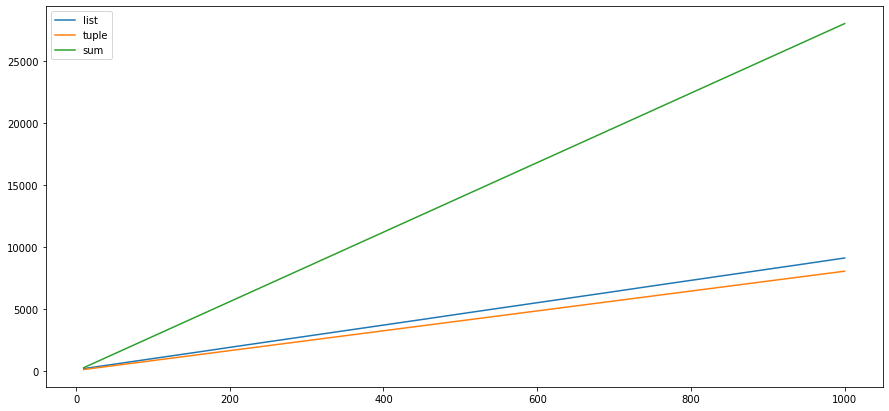

In [35]:
r_ends = np.linspace(10, 10 ** 3, 21).astype(int)

pd.DataFrame(index=r_ends,
             data={
                 "list": [sys.getsizeof(list(range(e))) for e in r_ends],
                 "tuple": [sys.getsizeof(tuple(range(e))) for e in r_ends],
                 "sum": [sum([sys.getsizeof(_e) for _e in range(e)]) for e in r_ends]
             }).plot(figsize=(15,7))

In [36]:
l1 = list(r)
sys.getsizeof(l1)

900112

In [37]:
l2 = [e ** 2 for e in r]

In [38]:
sys.getsizeof(l2)

824464

In [39]:
sys.getsizeof(l1[:len(l1) // 2])

400064

In [40]:
sys.getsizeof(l1[len(l1) // 2:])

400064

In [41]:
sys.getsizeof(l1[:])

800064

In [42]:
l1 == l1[:]

True

In [43]:
l1 is l1[:]

False

In [44]:
a = 10
a is 10

True

In [45]:
b = 510
b is 510

False

In [46]:
c = 257
c is 257

False

In [47]:
d = 510
d is b

False

In [48]:
id(a)

140699237824448

In [49]:
id(10)

140699237824448

In [50]:
id(b), id(510)

(140698265748432, 140698265749392)

In [51]:
d = {"FING": 10 * 100}
l = [d] * 20

In [52]:
sys.getsizeof(l) + sum([sys.getsizeof(e) for e in l])

5024

In [53]:
l[0] is l[1]

True

In [54]:
arr = np.linspace(0, 2000, 100)

In [55]:
type(arr[2])

numpy.float64

In [56]:
sys.getsizeof(arr)

96

In [57]:
sys.getsizeof(arr[2])

32

In [58]:
arr_lengths = [5, 50, 500, 5000, 50000]
pd.Series([sys.getsizeof(np.linspace(0, 20000, e))
           for e in arr_lengths],
          index=arr_lengths)

5        96
50       96
500      96
5000     96
50000    96
dtype: int64

In [59]:
arr = np.linspace(0, 2000, 1000)

In [60]:
arr is arr

True

In [61]:
arr is arr.astype(np.float64)

False

In [62]:
arr2 = arr.astype(np.float64)

In [63]:
id(arr2)

140698273016368

In [64]:
sys.getsizeof(arr.astype(np.int64))

8096

### so this is considerably more complicated than just sys.getsizeof

_profiling_ is needed

- [here](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) is a chapter from a nice book by a nice guy, mostly for jupyter-notebooks but also with some timing
- [memory-profiler](https://github.com/pythonprofilers/memory_profiler) is a well maintained package, for .py files with introduction [here](https://pypi.org/project/memory-profiler/)
- [guppy/heapy](https://github.com/zhuyifei1999/guppy3) is a somewhat poorly documented but flexible memory profiling tool

## 3 - speed

In [65]:
import time
import hashlib

In [66]:
def randgen(n):
    sn = str(n)
    while True:
        r_out = hashlib.sha256(sn.encode("utf-8")).hexdigest()
        yield int(r_out,base=16)
        sn = r_out

In [67]:
r = randgen(time.time())

In [68]:
type(r)

generator

In [69]:
time.time()

1584882898.0279193

In [80]:
next(r)

37093311939918698385379057713703354650690994417428740312763994265916587621199

In [81]:
np.random.seed(42069)
for _ in range(10):
    print(np.random.randint(10 ** 8, 10 ** 9))

231032425
647364704
827604409
308804592
648433606
667472974
417751653
660784608
165840950
870562203


In [82]:
%%time
np.random.seed(42069)
hadit = []
while True:
    next_num = np.random.randint(10 ** 8, 10 ** 9)
    if next_num in hadit:
        break
    hadit.append(next_num)

CPU times: user 28.1 s, sys: 0 ns, total: 28.1 s
Wall time: 28.2 s


In [83]:
len(hadit)

61915

In [84]:
%%time
np.random.seed(42069)
hadit = dict()
while True:
    next_num = np.random.randint(10 ** 8, 10 ** 9)
    if hadit.get(next_num):
        break
    hadit[next_num] = True

CPU times: user 690 ms, sys: 0 ns, total: 690 ms
Wall time: 691 ms


In [85]:
len(hadit)

61915

In [86]:
%%time
np.random.seed(42069)
hadit = set()
while True:
    next_num = np.random.randint(10 ** 8,10 ** 9)
    if next_num in hadit:
        break
    hadit.add(next_num)

CPU times: user 680 ms, sys: 0 ns, total: 680 ms
Wall time: 684 ms


In [87]:
%%time
np.random.seed(42069)
hadit = np.array([])
while True:
    next_num = np.random.randint(10 ** 8, 10 ** 9)
    if next_num in hadit:
        break
    hadit = np.insert(hadit, 0, next_num)

CPU times: user 3.9 s, sys: 0 ns, total: 3.9 s
Wall time: 3.89 s


In [89]:
!pip install snakeviz

You should consider upgrading via the 'pip install --upgrade pip' command.


In [90]:
%load_ext snakeviz

In [91]:
%%snakeviz
np.random.seed(42069)
hadit = []
while True:
    next_num = np.random.randint(10 ** 8, 10 ** 9)
    if next_num in hadit:
        break
    hadit.append(next_num)

 
*** Profile stats marshalled to file '/tmp/tmpfrs7hjk9'. 
Embedding SnakeViz in this document...


In [ ]:
%%snakeviz
np.random.seed(42069)
hadit = np.array([])
while True:
    next_num = np.random.randint(10 ** 8, 10 ** 9)
    if next_num in hadit:
        break
    hadit = np.insert(hadit, 0, next_num)

In [93]:
%%time
np.random.seed(42069)
hadit = np.array([])
while True:
    next_num = np.random.randint(10 ** 8,10 ** 9)
    if np.isin(next_num, hadit):
        break
    hadit = np.insert(hadit, 0, next_num)

CPU times: user 2min 10s, sys: 10 ms, total: 2min 10s
Wall time: 2min 10s


### a bit harder search

In [94]:
%%time
np.random.seed(42069)
diff = 10 ** -8

def has_close_ehough(lst, e):
    for _e in lst:
        if abs(_e - e) < diff:
            return True
    return False

hadit = []
while True:
    next_num = np.random.normal()
    if has_close_ehough(hadit, next_num):
        break
    hadit.append(next_num)

CPU times: user 13.4 s, sys: 10 ms, total: 13.4 s
Wall time: 13.4 s


In [95]:
next_num

0.11645841106277204

In [96]:
len(hadit)

15542

In [97]:
%%time
np.random.seed(42069)
diff = 10 ** -8

def has_close_ehough(lst, e):
    bool_arr = abs(np.array(lst) - e) < diff
    return bool_arr.any()
    
hadit = []
while True:
    next_num = np.random.normal()
    if has_close_ehough(hadit, next_num):
        break
    hadit.append(next_num)

CPU times: user 4.33 s, sys: 0 ns, total: 4.33 s
Wall time: 4.33 s


In [98]:
next_num

0.11645841106277204

In [99]:
len(hadit)

15542

In [100]:
%%time
np.random.seed(42069)
diff = 10 ** - 10.5

def has_close_ehough(lst, e):
    bool_arr = abs(lst - e) < diff
    return bool_arr.any()
    
hadit = np.array([])
while True:
    next_num = np.random.normal()
    if has_close_ehough(hadit, next_num):
        break
    hadit = np.insert(hadit, 0, next_num)

CPU times: user 8.53 s, sys: 20 ms, total: 8.55 s
Wall time: 8.55 s


In [101]:
next_num

0.10650033112925411

In [102]:
len(hadit)

86759

In [103]:
%%time
np.random.seed(42069)
diff = 10 ** -10.5

def has_close_ehough(arr, e, ind):
    
    for side in [0,1]:
        try:
            if abs(hadit[fit_ind - side] - next_num) < diff:
                return True
        except IndexError:
            pass
    return False


hadit = np.array([])
while True:
    next_num = np.random.normal()
    fit_ind = np.searchsorted(hadit, next_num)
    if has_close_ehough(hadit, next_num, fit_ind):
        break
    hadit = np.insert(hadit, fit_ind, next_num)

CPU times: user 4.63 s, sys: 10 ms, total: 4.64 s
Wall time: 4.65 s


In [104]:
next_num

0.10650033112925411

In [105]:
len(hadit)

86759

### memory profiling basics!

- getsizeof
  - unicode / np.float16 / float 64 ... endocings
- id / is


### speeding up searching

- uniqueness
- order

## the weird way of pandas

In [9]:
prod = list(itertools.product(range(500), range(5000), "ABCDEFG"))

In [10]:
len(prod)

17500000

In [11]:
df = pd.DataFrame(prod).assign(num=lambda df: df.index * 3)

In [12]:
%%time
df.loc[(df.loc[:, 0] == 70) & 
       (df.loc[:, 1] == 799) &
       (df.loc[:, 2] == "B"),:]

CPU times: user 960 ms, sys: 150 ms, total: 1.11 s
Wall time: 1.11 s


,0,1,2,num
2455594,70,799,B,7366782


In [13]:
df2 = df.set_index([0,1,2])

In [14]:
df2.head()

num
0 1 2     
0 0 A    0
    B    3
    C    6
    D    9
    E   12

In [15]:
%%time
df2.loc[(70, 799, "B"),:]

CPU times: user 2.18 s, sys: 190 ms, total: 2.37 s
Wall time: 2.37 s


num    7366782
Name: (70, 799, B), dtype: int64